In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Training Data

In [2]:
df = pd.read_csv('../elena/data/training_final_latcorr.csv')
print(df.shape)
print(df.columns)
df.head(5)

(154, 42)
Index(['field_1', 'Name', 'Longitude', 'Latitude', 'CO2 (mg C m¯² d¯¹)',
       'CH4 (mg C m-2 d-1)', 'CO2 (g/kWh)', 'CH4 (g/kWh)',
       'Area / Electricity', 'Area_km2', 'Age', 'Volume_km3',
       'Areakm2_div_Volkm3', 'org_c', 'temp_annual_avg', 'temp_spring_avg_lc',
       'temp_spring_avg', 'temp_summer_avg_lc', 'temp_summer_avg',
       'temp_fall_avg_lc', 'temp_fall_avg', 'temp_winter_avg_lc',
       'temp_winter_avg', 'NDVI_annual_avg', 'NDVI_spring_avg_lc',
       'NDVI_spring_avg', 'NDVI_summer_avg_lc', 'NDVI_summer_avg',
       'NDVI_fall_avg_lc', 'NDVI_fall_avg', 'NDVI_winter_avg_lc',
       'NDVI_winter_avg', 'npp_annual_avg', 'npp_spring_avg_lc',
       'npp_spring_avg', 'npp_summer_avg_lc', 'npp_summer_avg',
       'npp_fall_avg_lc', 'npp_fall_avg', 'npp_winter_avg_lc',
       'npp_winter_avg', 'erosion'],
      dtype='object')


,field_1,Name,Longitude,Latitude,CO2 (mg C m¯² d¯¹),CH4 (mg C m-2 d-1),CO2 (g/kWh),CH4 (g/kWh),Area / Electricity,Area_km2,...,npp_annual_avg,npp_spring_avg_lc,npp_spring_avg,npp_summer_avg_lc,npp_summer_avg,npp_fall_avg_lc,npp_fall_avg,npp_winter_avg_lc,npp_winter_avg,erosion
0,116,Segredo,-52.100000,-25.783333,600.0,29.9,15.167696,0.274857,0.018889,82.0,...,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389
1,117,Segredo,-52.100000,-25.783333,1306.1,5.0,33.017545,0.045963,0.018889,82.0,...,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389
2,45,Itaipu,-54.550000,-25.383333,328.6,NaN,6.603175,NaN,0.015015,1350.0,...,87.000000,79.000000,85.333336,87.000000,96.666664,85.333336,79.000000,96.666664,87.000000,32.145058
3,104,RibeirÃ£o das Lages,-43.883333,-22.700000,22.1,NaN,NaN,NaN,NaN,30.0,...,151.416672,153.333328,179.333328,156.666672,170.666672,179.333328,153.333328,170.666672,156.666672,0.541019
4,7,Barra Bonita,-48.583333,-22.516667,1036.4,9.9,3187.260766,11.071149,2.297872,324.0,...,132.750000,94.000000,166.000000,130.000000,141.000000,166.000000,94.000000,141.000000,130.000000,7.974369


In [3]:
df.describe()

,field_1,Longitude,Latitude,CO2 (mg C m¯² d¯¹),CH4 (mg C m-2 d-1),CO2 (g/kWh),CH4 (g/kWh),Area / Electricity,Area_km2,Age,...,npp_annual_avg,npp_spring_avg_lc,npp_spring_avg,npp_summer_avg_lc,npp_summer_avg,npp_fall_avg_lc,npp_fall_avg,npp_winter_avg_lc,npp_winter_avg,erosion
count,154.000000,154.000000,154.000000,142.000000,98.000000,98.000000,82.000000,123.000000,151.000000,152.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.500000,-60.757850,28.521474,519.006338,53.637959,1123.482359,51.598100,2.253623,555.503311,35.493421,...,95.704546,78.861472,92.590909,144.324675,146.270563,86.796537,73.067100,72.571429,70.625541,4.914802
std,44.600075,40.343219,31.677379,629.551776,135.005121,4914.811966,283.871759,17.483227,765.159433,24.369125,...,28.396873,40.006566,41.340089,50.099972,51.670437,36.641372,32.771415,52.046510,47.542792,14.029710
min,1.000000,-126.000000,-25.783333,-325.900000,0.010000,0.105297,0.000009,0.001250,1.000000,1.000000,...,45.333332,24.333334,35.000000,16.666666,16.666666,39.666668,24.333334,32.333332,32.333332,0.000198
25%,39.250000,-79.883333,-8.800000,144.200000,4.325000,16.842265,0.075349,0.024760,35.500000,15.750000,...,77.916664,46.916668,55.000000,104.999998,106.666666,59.750001,49.000000,33.000000,33.000000,0.037119
50%,77.500000,-57.591667,46.800000,354.500000,12.600000,74.398598,0.855522,0.118012,306.000000,31.500000,...,93.208336,72.166668,90.666664,147.500000,149.666672,77.000000,70.666668,38.000000,38.000000,0.168777
75%,115.750000,-48.112917,50.312500,685.775000,45.750000,409.489171,7.721096,0.651786,719.000000,47.500000,...,113.854164,97.916666,124.500002,187.250004,185.833332,107.416664,83.916666,116.333336,107.333336,1.591594
max,154.000000,27.733333,68.000000,3800.000000,1140.000000,47055.481000,2523.039964,193.824485,4318.000000,95.000000,...,200.500000,212.000000,207.666672,243.666672,243.666672,207.666672,212.000000,225.000000,202.000000,97.916649


In [4]:
df.describe()

,field_1,Longitude,Latitude,CO2 (mg C m¯² d¯¹),CH4 (mg C m-2 d-1),CO2 (g/kWh),CH4 (g/kWh),Area / Electricity,Area_km2,Age,...,npp_annual_avg,npp_spring_avg_lc,npp_spring_avg,npp_summer_avg_lc,npp_summer_avg,npp_fall_avg_lc,npp_fall_avg,npp_winter_avg_lc,npp_winter_avg,erosion
count,154.000000,154.000000,154.000000,142.000000,98.000000,98.000000,82.000000,123.000000,151.000000,152.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.500000,-60.757850,28.521474,519.006338,53.637959,1123.482359,51.598100,2.253623,555.503311,35.493421,...,95.704546,78.861472,92.590909,144.324675,146.270563,86.796537,73.067100,72.571429,70.625541,4.914802
std,44.600075,40.343219,31.677379,629.551776,135.005121,4914.811966,283.871759,17.483227,765.159433,24.369125,...,28.396873,40.006566,41.340089,50.099972,51.670437,36.641372,32.771415,52.046510,47.542792,14.029710
min,1.000000,-126.000000,-25.783333,-325.900000,0.010000,0.105297,0.000009,0.001250,1.000000,1.000000,...,45.333332,24.333334,35.000000,16.666666,16.666666,39.666668,24.333334,32.333332,32.333332,0.000198
25%,39.250000,-79.883333,-8.800000,144.200000,4.325000,16.842265,0.075349,0.024760,35.500000,15.750000,...,77.916664,46.916668,55.000000,104.999998,106.666666,59.750001,49.000000,33.000000,33.000000,0.037119
50%,77.500000,-57.591667,46.800000,354.500000,12.600000,74.398598,0.855522,0.118012,306.000000,31.500000,...,93.208336,72.166668,90.666664,147.500000,149.666672,77.000000,70.666668,38.000000,38.000000,0.168777
75%,115.750000,-48.112917,50.312500,685.775000,45.750000,409.489171,7.721096,0.651786,719.000000,47.500000,...,113.854164,97.916666,124.500002,187.250004,185.833332,107.416664,83.916666,116.333336,107.333336,1.591594
max,154.000000,27.733333,68.000000,3800.000000,1140.000000,47055.481000,2523.039964,193.824485,4318.000000,95.000000,...,200.500000,212.000000,207.666672,243.666672,243.666672,207.666672,212.000000,225.000000,202.000000,97.916649


# Drop and Reverse
- Electricity generated (kWh)
- Drop redundant columns

In [5]:
df['kWh'] = df['Area_km2'] / df['Area / Electricity']
df = df.drop(['Longitude', 'Latitude','CO2 (g/kWh)', 'CH4 (g/kWh)', 'Area / Electricity', 'Name', 'field_1',
              'temp_spring_avg', 'temp_summer_avg', 'temp_fall_avg', 'temp_winter_avg', 
              'NDVI_spring_avg', 'NDVI_summer_avg', 'NDVI_fall_avg', 'NDVI_winter_avg', 
              'npp_spring_avg' , 'npp_summer_avg' , 'npp_fall_avg' , 'npp_winter_avg'], axis=1)

In [6]:
df.columns

Index(['CO2 (mg C m¯² d¯¹)', 'CH4 (mg C m-2 d-1)', 'Area_km2', 'Age',
       'Volume_km3', 'Areakm2_div_Volkm3', 'org_c', 'temp_annual_avg',
       'temp_spring_avg_lc', 'temp_summer_avg_lc', 'temp_fall_avg_lc',
       'temp_winter_avg_lc', 'NDVI_annual_avg', 'NDVI_spring_avg_lc',
       'NDVI_summer_avg_lc', 'NDVI_fall_avg_lc', 'NDVI_winter_avg_lc',
       'npp_annual_avg', 'npp_spring_avg_lc', 'npp_summer_avg_lc',
       'npp_fall_avg_lc', 'npp_winter_avg_lc', 'erosion', 'kWh'],
      dtype='object')

In [7]:
df.shape

(154, 24)

# Distribution of target variables

count      98.000000
mean       53.637959
std       135.005121
min         0.010000
25%         4.325000
50%        12.600000
75%        45.750000
max      1140.000000
Name: CH4 (mg C m-2 d-1), dtype: float64

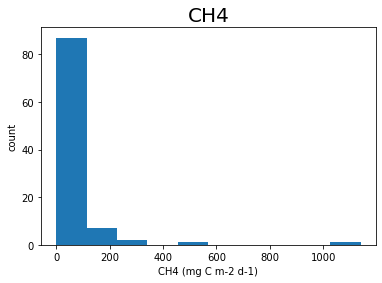

In [8]:
df["CH4 (mg C m-2 d-1)"].plot.hist()
plt.xlabel("CH4 (mg C m-2 d-1)")
plt.ylabel("count")
plt.title("CH4", fontsize = 20)
df["CH4 (mg C m-2 d-1)"].describe()

count     142.000000
mean      519.006338
std       629.551776
min      -325.900000
25%       144.200000
50%       354.500000
75%       685.775000
max      3800.000000
Name: CO2 (mg C m¯² d¯¹), dtype: float64

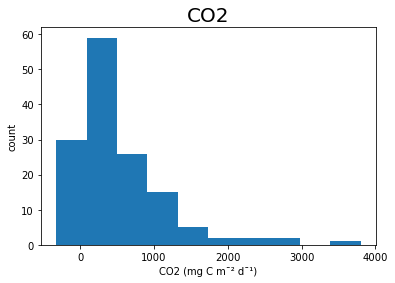

In [9]:
df["CO2 (mg C m¯² d¯¹)"].plot.hist()
plt.xlabel("CO2 (mg C m¯² d¯¹)")
plt.ylabel("count")
plt.title("CO2", fontsize = 20)
df["CO2 (mg C m¯² d¯¹)"].describe()

C:\Users\kkrle\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


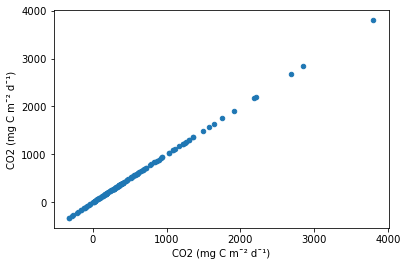

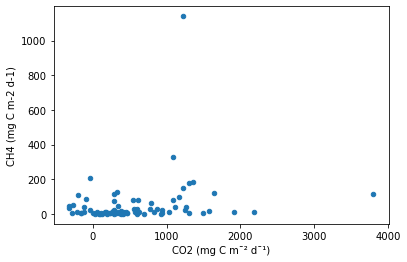

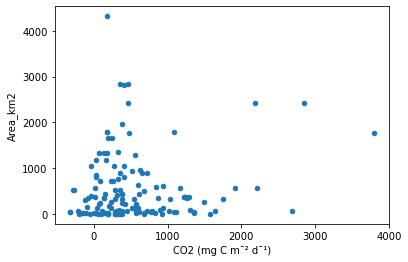

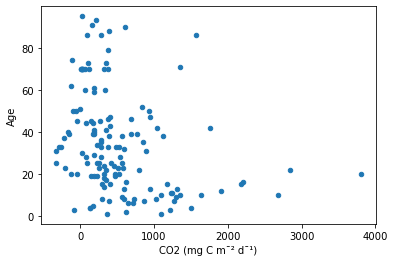

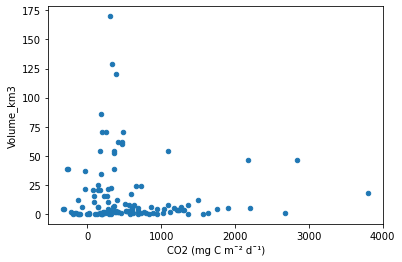

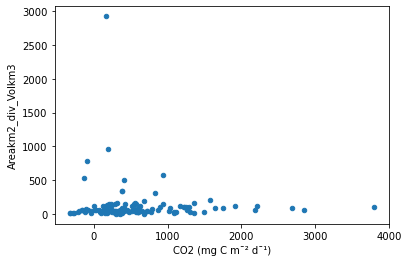

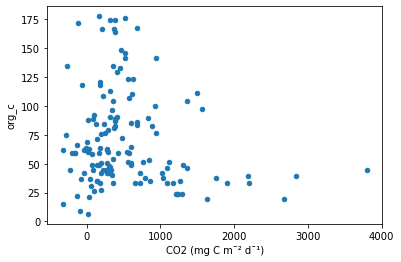

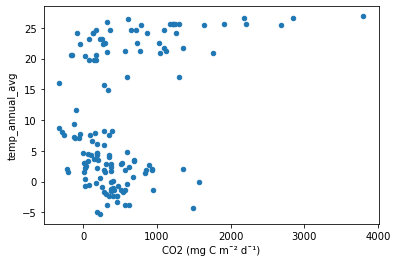

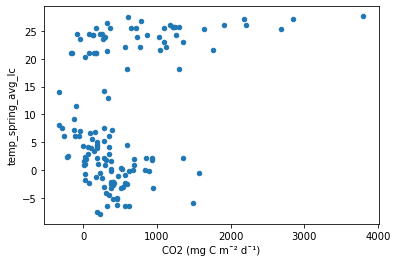

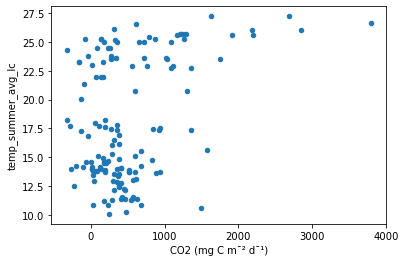

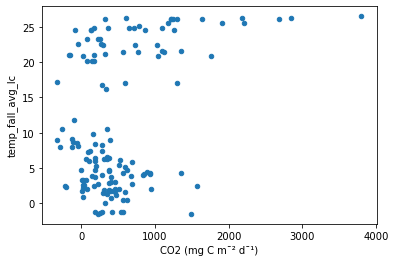

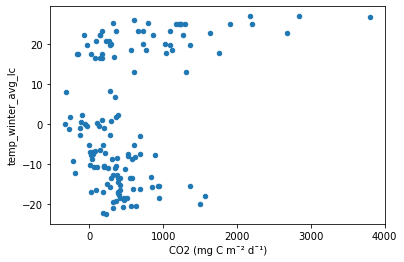

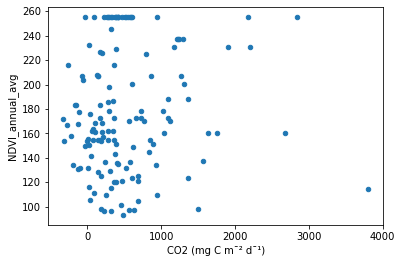

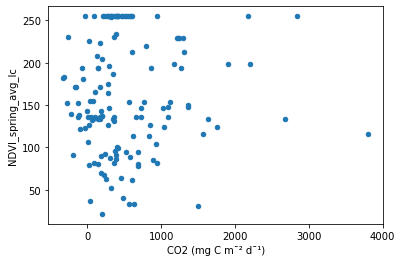

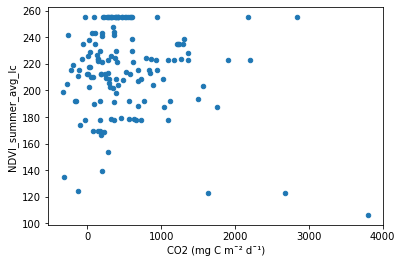

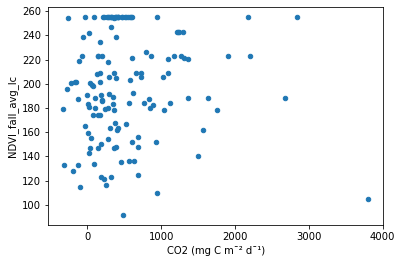

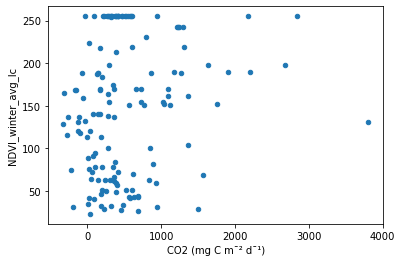

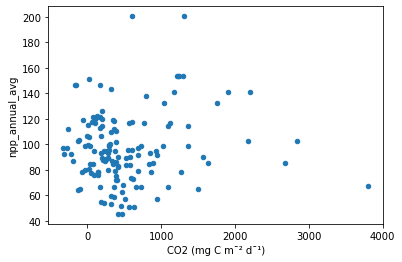

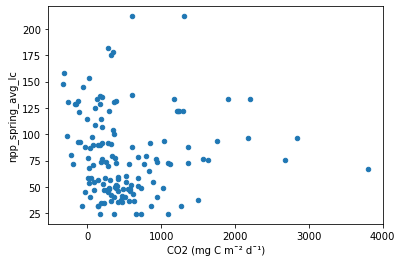

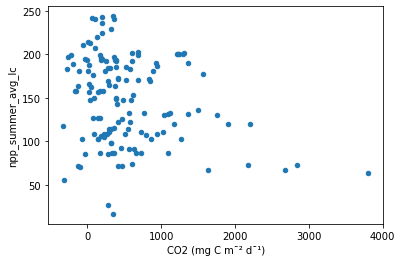

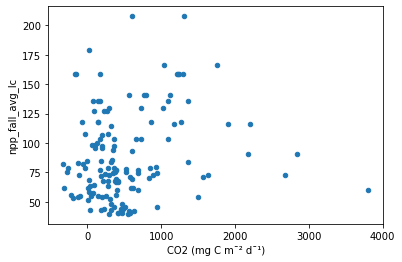

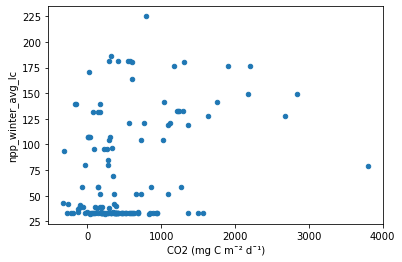

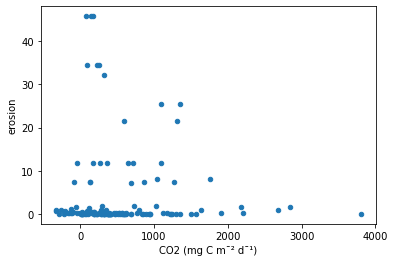

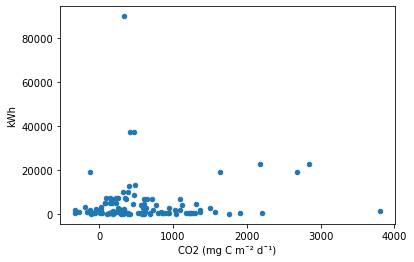

In [10]:
for i in range(len(df.columns)):
    df.plot(kind="scatter", x="CO2 (mg C m¯² d¯¹)", y=df.columns[i]) 

# Inspect Outliers

In [11]:
corr = df.corr(method='pearson').drop(['CH4 (mg C m-2 d-1)']).sort_values('CH4 (mg C m-2 d-1)', ascending=False)['CH4 (mg C m-2 d-1)']
corr 

temp_fall_avg_lc      0.411107
temp_annual_avg       0.407736
temp_spring_avg_lc    0.403777
temp_winter_avg_lc    0.401994
temp_summer_avg_lc    0.378386
npp_winter_avg_lc     0.334945
npp_fall_avg_lc       0.282779
npp_annual_avg        0.277875
NDVI_winter_avg_lc    0.267580
NDVI_annual_avg       0.263725
NDVI_fall_avg_lc      0.229226
NDVI_spring_avg_lc    0.224423
CO2 (mg C m¯² d¯¹)    0.216314
npp_spring_avg_lc     0.195437
NDVI_summer_avg_lc    0.134449
erosion              -0.010061
Area_km2             -0.020120
Areakm2_div_Volkm3   -0.022158
npp_summer_avg_lc    -0.052204
Volume_km3           -0.069826
kWh                  -0.083116
Age                  -0.183232
org_c                -0.298769
Name: CH4 (mg C m-2 d-1), dtype: float64

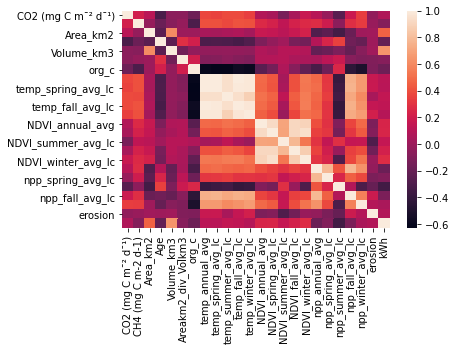

In [12]:
sns.heatmap(df.corr())

In [13]:
corr = df.corr(method='pearson').drop(["CO2 (mg C m¯² d¯¹)"]).sort_values("CO2 (mg C m¯² d¯¹)", ascending=False)["CO2 (mg C m¯² d¯¹)"]
corr 

temp_fall_avg_lc      0.386603
temp_summer_avg_lc    0.385203
temp_annual_avg       0.370218
temp_spring_avg_lc    0.362069
temp_winter_avg_lc    0.347086
npp_winter_avg_lc     0.340916
CH4 (mg C m-2 d-1)    0.216314
npp_fall_avg_lc       0.185158
NDVI_winter_avg_lc    0.175236
Area_km2              0.119796
npp_annual_avg        0.107013
NDVI_annual_avg       0.089654
kWh                   0.076682
NDVI_fall_avg_lc      0.050040
NDVI_spring_avg_lc    0.045701
npp_spring_avg_lc    -0.013958
erosion              -0.031265
Areakm2_div_Volkm3   -0.058104
Volume_km3           -0.062437
NDVI_summer_avg_lc   -0.127077
org_c                -0.165409
npp_summer_avg_lc    -0.251137
Age                  -0.309833
Name: CO2 (mg C m¯² d¯¹), dtype: float64

# Missing Ratio

In [14]:
all_na = (df.isnull().sum() / len(df)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data

,Missing Ratio
CH4 (mg C m-2 d-1),36.363636
kWh,20.129870
Areakm2_div_Volkm3,13.636364
Volume_km3,12.987013
CO2 (mg C m¯² d¯¹),7.792208
Area_km2,1.948052
org_c,1.298701
Age,1.298701
NDVI_winter_avg_lc,0.649351
NDVI_fall_avg_lc,0.649351


Text(0.5, 1.0, 'Percent missing data by feature')

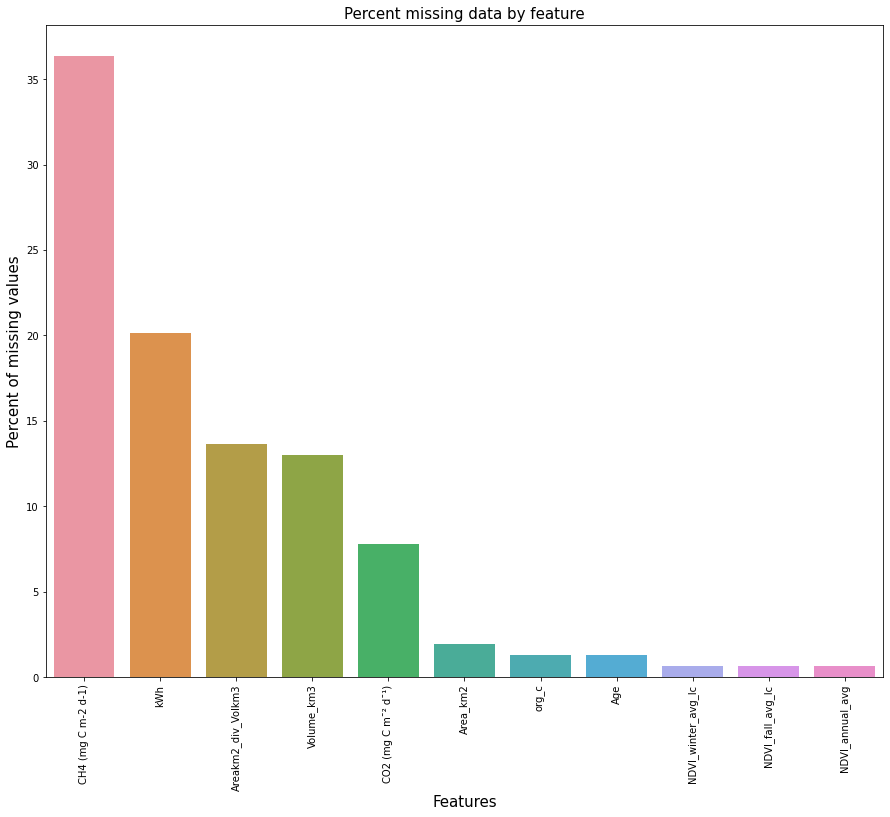

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# EDA

In [16]:
ch4 = df.drop(['CO2 (mg C m¯² d¯¹)'], axis=1)
ch4 = ch4[ch4['CH4 (mg C m-2 d-1)'].notna()]

In [17]:
ch4.columns

Index(['CH4 (mg C m-2 d-1)', 'Area_km2', 'Age', 'Volume_km3',
       'Areakm2_div_Volkm3', 'org_c', 'temp_annual_avg', 'temp_spring_avg_lc',
       'temp_summer_avg_lc', 'temp_fall_avg_lc', 'temp_winter_avg_lc',
       'NDVI_annual_avg', 'NDVI_spring_avg_lc', 'NDVI_summer_avg_lc',
       'NDVI_fall_avg_lc', 'NDVI_winter_avg_lc', 'npp_annual_avg',
       'npp_spring_avg_lc', 'npp_summer_avg_lc', 'npp_fall_avg_lc',
       'npp_winter_avg_lc', 'erosion', 'kWh'],
      dtype='object')

C:\Users\kkrle\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


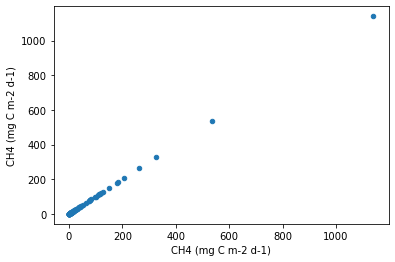

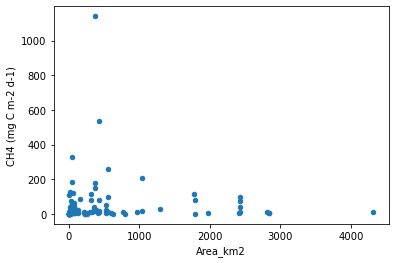

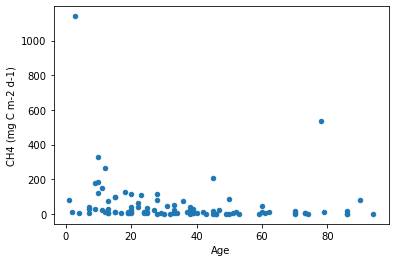

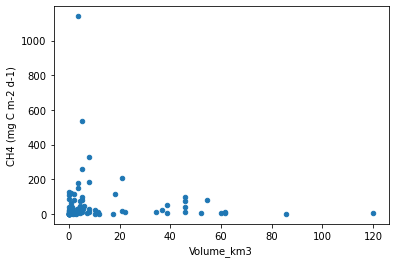

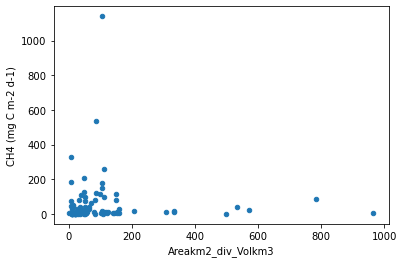

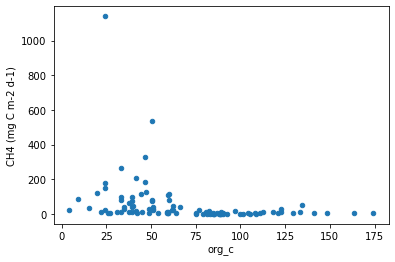

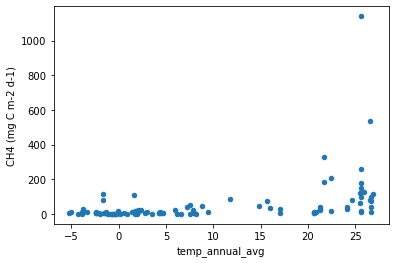

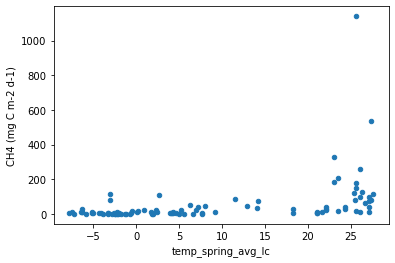

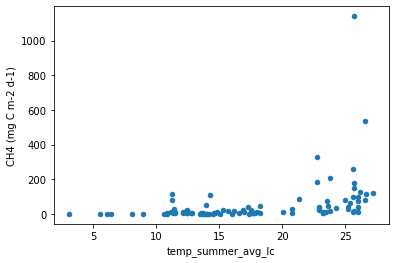

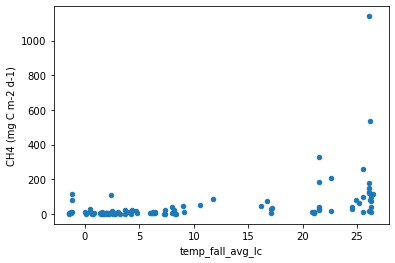

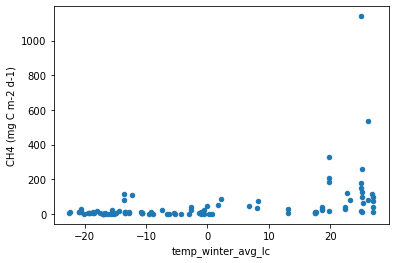

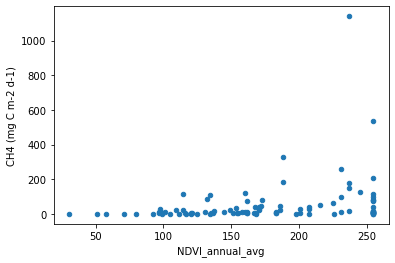

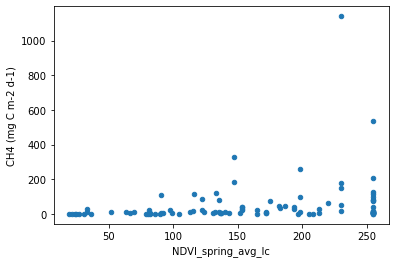

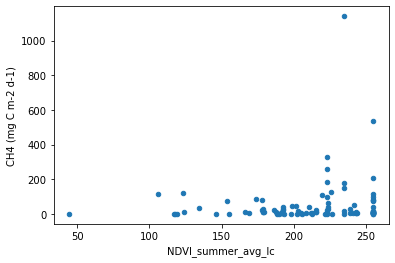

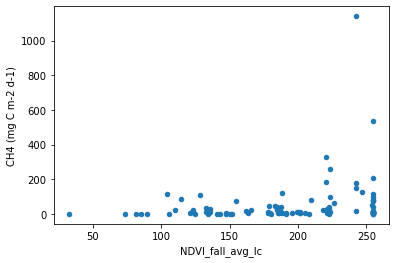

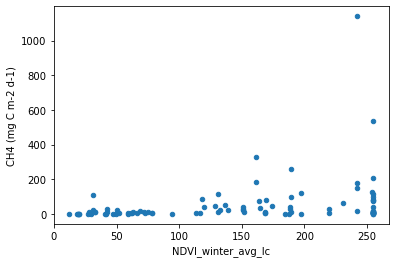

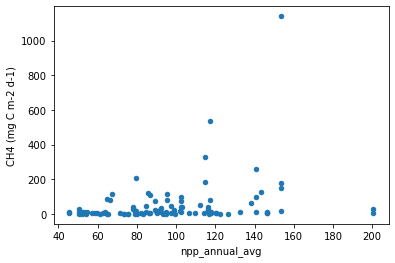

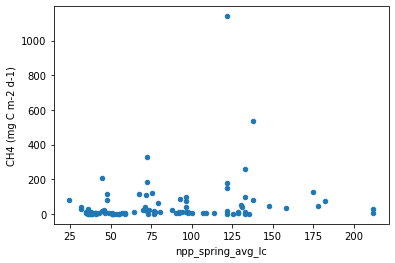

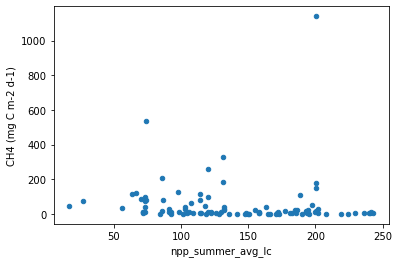

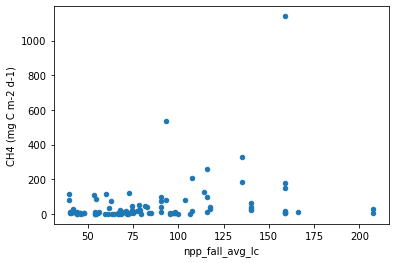

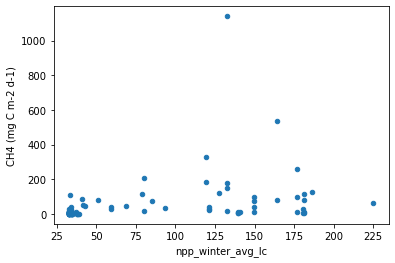

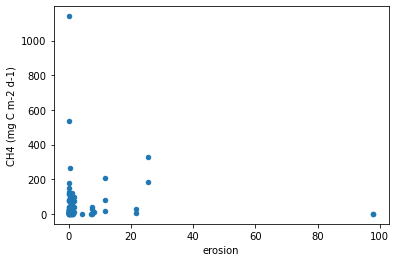

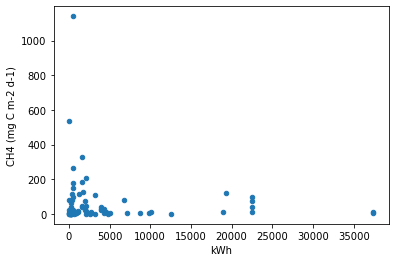

In [18]:
for i in range(len(ch4.columns)):
    df.plot(kind="scatter", x=ch4.columns[i], y="CH4 (mg C m-2 d-1)") 

In [19]:
# Drop the outliers (>250 CH4, >2500 CO2)
df = df[df['CH4 (mg C m-2 d-1)']<250]
df = df[df['CO2 (mg C m¯² d¯¹)']<2500]

# Imputing Data

In [20]:
from sklearn.impute import KNNImputer
model_impute = KNNImputer(n_neighbors=int(np.sqrt(ch4.shape[0])))
ch4_imputed = model_impute.fit_transform(ch4)

In [21]:
ch4_imputed = pd.DataFrame(columns=ch4.columns, data=ch4_imputed)

In [22]:
for column in ch4_imputed:
    print(column, ':',  ch4_imputed[column].isna().sum())

CH4 (mg C m-2 d-1) : 0
Area_km2 : 0
Age : 0
Volume_km3 : 0
Areakm2_div_Volkm3 : 0
org_c : 0
temp_annual_avg : 0
temp_spring_avg_lc : 0
temp_summer_avg_lc : 0
temp_fall_avg_lc : 0
temp_winter_avg_lc : 0
NDVI_annual_avg : 0
NDVI_spring_avg_lc : 0
NDVI_summer_avg_lc : 0
NDVI_fall_avg_lc : 0
NDVI_winter_avg_lc : 0
npp_annual_avg : 0
npp_spring_avg_lc : 0
npp_summer_avg_lc : 0
npp_fall_avg_lc : 0
npp_winter_avg_lc : 0
erosion : 0
kWh : 0


# Standardize data

In [23]:
from sklearn.preprocessing import StandardScaler
data = ch4_imputed.drop(['CH4 (mg C m-2 d-1)'], axis=1).copy()
scaler = StandardScaler()
ch4_scaled = pd.DataFrame(scaler.fit_transform(data),columns=ch4.columns[1:])

In [24]:
ch4_scaled.head()

,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_summer_avg_lc,temp_fall_avg_lc,temp_winter_avg_lc,...,NDVI_summer_avg_lc,NDVI_fall_avg_lc,NDVI_winter_avg_lc,npp_annual_avg,npp_spring_avg_lc,npp_summer_avg_lc,npp_fall_avg_lc,npp_winter_avg_lc,erosion,kWh
0,-0.547924,-0.967189,-0.433627,-0.545451,-0.565552,0.690532,0.787489,0.514966,0.623463,0.745659,...,0.675381,0.538416,0.832115,3.220547,3.008378,1.165633,3.118491,1.853590,1.208241,0.058430
1,-0.547924,-0.967189,-0.433627,-0.545451,-0.565552,0.690532,0.787489,0.514966,0.623463,0.745659,...,0.675381,0.538416,0.832115,3.220547,3.008378,1.165633,3.118491,1.853590,1.208241,0.058430
2,-0.261174,0.300490,-0.385958,-0.197602,-0.879614,1.030599,1.063823,0.965749,0.999553,1.014583,...,-0.554599,-0.256661,0.046779,1.124689,0.251586,-0.195247,2.050067,1.157470,0.274100,-0.526786
3,-0.613094,0.169351,-0.552801,-0.372606,-0.271596,1.012399,1.020197,0.920451,1.016666,1.005118,...,-0.450770,0.168613,0.240211,1.539736,1.053703,0.333984,1.862024,1.133873,-0.262521,-0.417272
4,-0.613094,0.169351,-0.552801,-0.372606,-0.271596,1.012399,1.020197,0.920451,1.016666,1.005118,...,-0.450770,0.168613,0.240211,1.539736,1.053703,0.333984,1.862024,1.133873,-0.262521,-0.417272


# Using Multiple Linear Regression to Predict CH4 Emissions

In [25]:
X = ch4_scaled
y = pd.Series(ch4['CH4 (mg C m-2 d-1)'])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Baseline Model

In [28]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
baseline = dummy_regr.score(X_train, y_train)
print("Baseline R^2: %f" %baseline)

Baseline R^2: 0.000000


# Multiple Linear Regression

In [29]:
ols = LinearRegression()
ols.fit(X_train, y_train)
print("Coefficients: %s" % ols.coef_)
print("Intercept: %f" % ols.intercept_)
y_test_prediction = ols.predict(X_test)
ols.score(X_train, y_train)

Coefficients: [  -4.11798401  -12.2943686    -2.22211661   -2.61601685  -14.88750628
 -352.70412285  321.02778151  -50.77061677  159.97438183  -42.51779195
   -5.96225652  -38.3271393    17.91839564    6.2822974    37.84886832
   21.00668938    2.42504497  -14.53893331  -41.61113523  -15.6382098
    7.70895933  -15.88466535]
Intercept: 36.221939


0.4654469522242459

In [30]:
import statsmodels.api as sm

ols = sm.OLS(list(y_train), X_train)
results = ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              1.269
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                       0.233
Time:                        17:45:47   Log-Likelihood:                         -421.66
No. Observations:                  78   AIC:                                      887.3
Df Residuals:                      56   BIC:                                      939.2
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

# Penalized Regression

## 1. Ridge

In [31]:
from sklearn.linear_model import Ridge, Lasso

In [32]:
ridge = Ridge()
ridge.set_params(alpha=.01, normalize=False)
ridge.fit(X_train,y_train)
print('The intercept is % f' %(ridge.intercept_))
ridgeCoef = pd.Series(ridge.coef_, index=X_train.columns)
print('The slopes are \n%s' %(ridgeCoef.sort_values()))
ridge.score(X_train, y_train)

The intercept is  36.022681
The slopes are 
temp_annual_avg      -128.821640
temp_winter_avg_lc   -124.757012
temp_summer_avg_lc    -82.372849
NDVI_spring_avg_lc    -37.769898
npp_fall_avg_lc       -37.133608
kWh                   -16.069777
org_c                 -14.743330
Age                   -12.186475
npp_winter_avg_lc     -10.207803
npp_summer_avg_lc      -9.700883
NDVI_annual_avg        -4.894642
Area_km2               -4.133335
Areakm2_div_Volkm3     -1.922951
Volume_km3             -1.840657
npp_spring_avg_lc       7.215936
erosion                 7.329054
NDVI_fall_avg_lc        7.378604
npp_annual_avg          8.955067
NDVI_summer_avg_lc     17.023237
NDVI_winter_avg_lc     35.579816
temp_fall_avg_lc      115.028721
temp_spring_avg_lc    251.835675
dtype: float64


0.46382191746684587

In [33]:
alphas= np.linspace(1e-10,10,25)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
coefs = pd.DataFrame(coefs, columns = X_train.columns)  
coefs.head()

,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_summer_avg_lc,temp_fall_avg_lc,temp_winter_avg_lc,...,NDVI_summer_avg_lc,NDVI_fall_avg_lc,NDVI_winter_avg_lc,npp_annual_avg,npp_spring_avg_lc,npp_summer_avg_lc,npp_fall_avg_lc,npp_winter_avg_lc,erosion,kWh
0,-4.117984,-12.294369,-2.222116,-2.616015,-14.887507,-352.703571,321.027648,-50.770713,159.974284,-42.518028,...,17.918393,6.282300,37.848864,21.006658,2.425059,-14.538922,-41.611125,-15.638196,7.708958,-15.884667
1,-1.771148,-7.122149,-0.381982,0.309480,-4.511112,5.036621,5.954367,4.539739,5.145329,4.639800,...,2.735354,2.520464,1.319861,-2.867700,-2.514650,-3.397914,-3.829726,1.298490,3.281403,-6.019454
2,-1.058314,-5.484350,-0.478128,0.168758,-3.798041,4.357304,4.804522,4.000195,4.364562,4.136796,...,1.348908,1.774618,1.396245,-1.751027,-1.944164,-3.175450,-1.602780,1.799907,2.237865,-3.941011
3,-0.725844,-4.533206,-0.453992,0.049751,-3.371174,3.949637,4.240213,3.640819,3.936476,3.792091,...,0.816928,1.453726,1.401100,-1.133990,-1.463783,-2.894032,-0.696802,1.950100,1.715053,-2.859096
4,-0.536217,-3.896146,-0.411528,-0.031399,-3.070176,3.653284,3.866569,3.374322,3.633679,3.528064,...,0.554776,1.273432,1.378201,-0.744115,-1.111412,-2.644102,-0.214214,1.982252,1.392232,-2.202449


Text(0, 0.5, 'slope values')

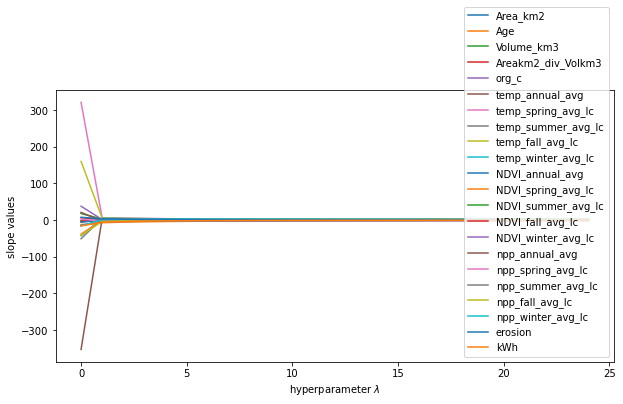

In [34]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

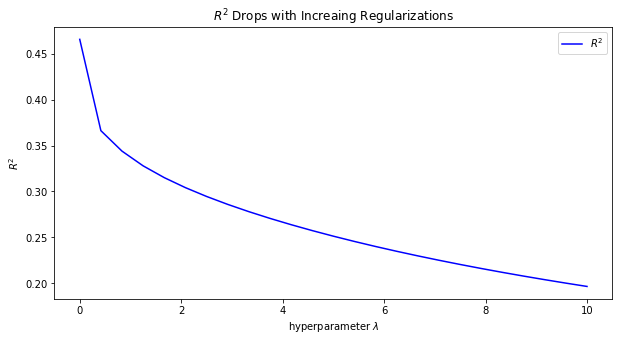

In [35]:
plt.plot(alphas, scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

## 2. Lasso

In [36]:
lasso = Lasso()
lasso.set_params(alpha=.01, normalize=False)
lasso.fit(X_train,y_train)
print('The intercept is % f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=X_train.columns)
print('The slopes are \n%s' %(lassoCoef.sort_values()))
lasso.score(X_train, y_train)

The intercept is  35.803508
The slopes are 
temp_winter_avg_lc   -217.123615
temp_summer_avg_lc   -118.838169
NDVI_spring_avg_lc    -36.812969
npp_fall_avg_lc       -33.457077
kWh                   -16.360628
org_c                 -14.556087
Age                   -12.255874
npp_summer_avg_lc      -6.582823
npp_winter_avg_lc      -6.361882
Area_km2               -4.049077
NDVI_annual_avg        -3.481246
Volume_km3             -1.522753
Areakm2_div_Volkm3     -1.210910
npp_annual_avg         -0.000000
erosion                 6.881609
NDVI_fall_avg_lc        8.550196
npp_spring_avg_lc      11.336852
NDVI_summer_avg_lc     15.597751
NDVI_winter_avg_lc     33.169614
temp_fall_avg_lc       67.088387
temp_annual_avg       103.873376
temp_spring_avg_lc    190.919369
dtype: float64


C:\Users\kkrle\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47511.61602903637, tolerance: 24.020573476538466
  model = cd_fast.enet_coordinate_descent(


0.4592401828134115

In [37]:
alphas= np.linspace(1e-10,10,25)
lasso.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs.append(lasso.coef_)
        scores.append(lasso.score(X_train, y_train))
coefs = pd.DataFrame(coefs, columns = X_train.columns)  
coefs.head()

C:\Users\kkrle\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64965.097813455395, tolerance: 24.020573476538466
  model = cd_fast.enet_coordinate_descent(


,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_summer_avg_lc,temp_fall_avg_lc,temp_winter_avg_lc,...,NDVI_summer_avg_lc,NDVI_fall_avg_lc,NDVI_winter_avg_lc,npp_annual_avg,npp_spring_avg_lc,npp_summer_avg_lc,npp_fall_avg_lc,npp_winter_avg_lc,erosion,kWh
0,-4.081099,-12.308416,-1.564895,-1.20046,-15.034400,124.273661,191.437053,-125.920331,66.321934,-231.237159,...,15.764881,8.852183,33.859592,3.07141,10.875949,-8.067529,-34.78895,-7.764202,6.827046,-16.577934
1,-0.000000,-6.827780,-0.000000,0.00000,-2.082654,0.000000,22.170183,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.584424,-0.00000,-0.000000,-2.829643,-0.00000,0.000000,0.000000,-2.050423
2,-0.000000,-3.986294,-0.000000,0.00000,-0.000000,0.000000,21.576622,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.00000,-0.000000,-0.000000,-0.00000,0.000000,0.000000,-0.000000
3,-0.000000,-1.044344,-0.000000,-0.00000,-0.000000,0.000000,18.498121,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,-0.000000,-0.000000,0.00000,0.000000,0.000000,-0.000000
4,0.000000,-0.000000,-0.000000,-0.00000,-0.000000,0.000000,14.999738,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.00000,0.000000,0.000000,-0.000000


Text(0, 0.5, 'slope values')

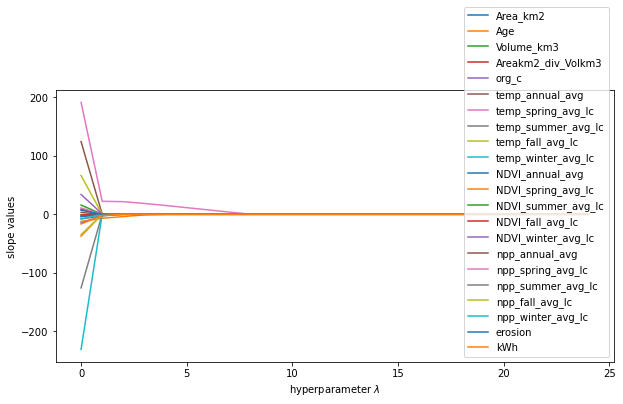

In [38]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values') 